# Monte Carlo ile Rastgele Yürüyüş ve Pi Sayısının hesaplanmas

Python öğretirken en büyük sorunlardan biri anlaşılabilir kısa kodlar ile anlamlı sonuçlar çıkarabilmektir. Benim de yaşadığım bu problem için internette de örnekleri yer alan iki kodlama konusuna değineceğiz.

1. Rasgele yürüyüş (Random walk): Eğer bir sürecte geçmiş gelecek için bir örnekleme değilse, veya süreçler kestirilemiyorsa kullanılır. Daha çok borsa fiyatlamalarında ve fizikte Brown hareketlerinde kullanılır
2. Pi sayısının tahmini: Pi sayısını rastlantısal metodlarla hesaplamaya çalışacağız


Tüm bunları yaparken de Monte Carlo yöntemini kullanacağız. Şöyle anlatmak gerekirse, mesela sıra ile tüm olasılıkları denemek yerine, rastgele olasılıklar ile sonuçların nasıl şekillendiğine, sonuçların nereye evrildiğine bakacağız. 

# Rasgele Yürüyüş

Önce kütüphanelerimizi yükleyerek başlayalım. **math** ve **random** kütüphanelerini yükleyeceğiz

In [2]:
import math
import random

Tüm bu çalışma boyunca iki temel komut kullanacağız
1. random.choice  : parametre olarak girilen değerlerden birini rastgele olarak dışarı verir
2. random.uniform : düzgün dağılımlı, yani tüm rastgele sayıların eşit dağılım sağladığı (0 ne kadar ise 1 de o kadar olasılıklı) bir fonksiyon

Önce random.choice ile başlayalım. random.choice içine mesela dilediğimiz harfleri vererek **Bir kelime bir işlem** oyunundaki gibi harfler üretmesini de sağlayabiliriz.

Mesela önce sesli harflerden başlayalım

In [3]:
random.choice(['a','e','i','ı'])

'a'

Şimdi de sessiz harfleri deneyelim

In [4]:
random.choice(['n','r','d','k','m','l','t'])

'n'

Şimdi hepsini karıştırarak, for ile tekrar ettirelim

In [5]:
harfsayisi=6                                         # 1   
for i in range(harfsayisi):                          # 2    
    sesliharf=random.choice(['a','e','i','ı'])       # 2.a önce verilen seriden bir sesli harf seçelim
    sessizharf=random.choice(['n','r','d','k','m','l','t'])  # 2.b şimdi de sessiz harf seçelim
    harf=random.choice([sessizharf,sesliharf])       # 2.c yukarıda seçtiğimiz sesli ve sessiz harflerden ikisinden biri
    print(harf,end="")                               # 2.d harfi yaz ama sonuna yeni satır ekleme

ramrtm

Yukarıdaki kod da sırası ile
1. Harf sayısını belirliyoruz. Üreteceğimiz kelime kaç harfli olacak
2. For döngüsü ile harf sayısı kadar aşağıdaki operasyonu tekrar ediyoruz
    <br/> **a . e,a,i,ı'dan birini rastgele seç ve sesliharf değişkenine ata
    <br/> b . n,r,d,k,m,l,t sessiz harflerinden birini seç ve sessizharf değişkenine ata
    <br/> c . Elimizde bir sesli ve bir sessiz harf var. Bir de bu ikisi arasında bir seçim yap
    <br/> d . Harfi ekrana yazdırırken satır sonuna birşey koyma ki harfler yanyana gelsin**

Şimdi konumuza gelelim. bir parçacık 1 boyutta ya ileri gidebilir ya geri ya sabit kalabilir. "0" noktasından başlarsa, ya 1 noktasına, ya -1 noktasına ya da hareket etmeyerek 0 noktasında kalarak devam edebilir.

Hareket seçenekleri -1,0,1'dir

In [6]:
random.choice([-1,0,1])

0

Şimdi rastgele 10 adım atalım

In [7]:
for i in range(10):
    print(random.choice([-1,0,1]),end=",")

1,-1,1,1,-1,-1,1,-1,-1,1,

Fakat rastgele 10 adım sonucunda hangi noktada olacak? Bu sebeple bir pozisyon değişkeni tanımlayalım. Aşağıdaki kodu her çalıştırdığımızda farklı bir sonuç göreceğiz

In [8]:
pozisyon=0
for i in range(10):
    pozisyon=pozisyon+random.choice([-1,0,1])
    
print("Son geldiğim nokta = ", pozisyon)

Son geldiğim nokta =  -1


Son pozisyon negatif ise, uzaklık ise bunun mutlak değeridir.

In [9]:
abs(pozisyon)

1

10 adım atıp başlangıç noktasından 5 adım uzakta olabiliyoruz. Kodu her çalıştırdığınızda bu rakam değişecektir. Aynı rakamları elde etmek için **random.seed()** komutunu kullanmanız gerekir.

# Rastgele adımda Monte Carlo ile simulasyon

Rastgele adım sayımız arttıkça başlangıç noktasından uzaklığımız neye göre değişmektedir? Şimdi bunu test edelim. Bunun için **100 rastgele** adımı **500** defa tekrarlayarak çıkan sonuca bakalım.
* baslangic : her seferinde, her simulasyonda 0 noktasıdan başlayacağız
* adimsayisi : her simulasyonda atacağımız **rastgele** adım sayısı
* simulasyonsayisi : toplamda kaç defa bu işlemi tekrarlayacağımız
olacaktır. 

Şimdi kodumuzu basitçe çalıştıralım

In [14]:
baslangic=0
adimsayisi=100
simulasyonsayisi=500
for s in range(simulasyonsayisi):
 baslangic=0
 for i in range(adimsayisi):
    baslangic=baslangic+random.choice([-1,0,1])
 print(baslangic,end=",")

-2,0,2,5,4,4,-7,-9,-10,2,-8,-1,-7,-6,16,-7,4,1,2,-9,13,-8,3,-3,-7,0,-17,6,2,3,4,-7,11,8,3,-13,-11,-4,3,-1,17,6,1,0,8,2,12,-1,4,0,-13,6,-2,-6,-3,-14,-3,-6,3,11,8,-4,-12,-9,2,-2,-4,1,3,-10,2,-8,-8,3,6,1,-6,7,-3,-9,-5,-8,6,-3,-11,-13,15,-1,6,-1,11,5,7,11,22,-2,-1,18,5,-8,-1,5,15,-5,-3,4,-11,1,-2,1,15,-8,20,-10,-11,9,-1,9,-8,5,-6,-11,-2,-21,1,-7,2,-3,11,0,-1,8,-9,-3,8,-10,10,-3,10,6,4,1,-1,-10,1,-12,-16,-7,-4,1,-12,-3,-11,3,-9,-4,5,4,-2,2,0,21,-3,-10,12,1,9,0,-2,-5,8,-13,-12,-7,13,-5,-1,-12,8,-11,-8,-6,10,0,2,-3,-10,-4,10,-2,4,-9,-9,-12,-7,-12,3,-3,20,1,-11,-1,-8,-7,-4,-3,-7,8,2,8,1,-13,2,6,23,-5,-11,-12,7,-15,-4,-7,10,-6,4,1,-2,-5,-5,-5,-1,-5,-4,4,4,-11,3,14,-10,-16,3,2,2,-2,-5,-2,6,-12,8,18,13,-4,5,-2,5,5,7,14,-7,10,-8,-8,-5,-8,-5,-5,-7,-11,8,4,-3,-12,-4,-13,6,0,2,14,3,-4,2,10,9,-11,22,-9,-1,7,-3,-6,3,8,-1,12,0,-5,3,8,-3,-8,-7,7,-6,14,-1,-14,-4,-10,4,4,1,-1,11,2,20,0,-3,-11,-7,-15,-4,3,2,-11,5,15,-2,9,3,8,-14,5,6,0,2,-11,-8,1,-1,1,-1,6,1,4,5,-5,-15,-3,-8,10,14,4,6,10,14,-5,3,-11,-3,11,-1

Evet, 500 defa 100 adım attık ama elimizde bir sürü rastgele 100 adım atılan 500 örnekleme oldu. Bunları nasıl kullanacağız? Bunun için tüm sonuçları  **kayıt** altına alacağız. Bunun için de bir dizi (**list**) kullanacağız. Kullanımı gayet basit.
* kayit=[] yazarak bir dizi değişkeni tanımla
* kayit.append(*değişken*) ile dizinin sonuna bir değişken daha ekle

Şimdi tüm simulasyon sonuçlarını kayıt altına alalım.

In [15]:
baslangic=0
adimsayisi=100
simulasyonsayisi=500
kayit=[]
for s in range(simulasyonsayisi):
 baslangic=0
 for i in range(adimsayisi):
    baslangic=baslangic+random.choice([-1,0,1])
 kayit.append(baslangic)

Artık tüm değişkenlerimiz hafızada kayıt değişkeni içinde. Dolayısıyla daha detaylı bir analiz yapabiliriz. Önce grafikleme için %pylab inline komutunu kullanalım

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Hemen kayit değişkeni ile ilgili analizleri yapalım. Önce boyutu ne ona bakalım. **shape** komutu tam bu konu için uygun. 

In [20]:
shape(kayit)

(500,)

Tüm 500 simulasyonun ortalamasına bakalım 

In [21]:
mean(kayit)

-0.5

Bu ne yahu? 500 kere 100 rastgele adımdaki tüm simulasyonların ortalaması -0.5 mi? Bir de grafiğe bakalım

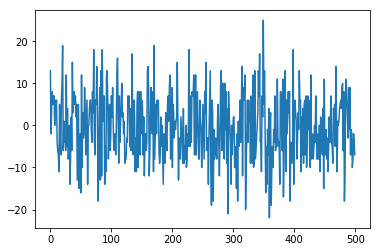

In [22]:
plot(kayit)

Bunun bir de histogramı var tabii ki

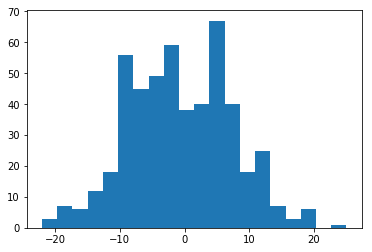

In [26]:
hist(kayit, bins=20);

Görüldüğü gibi 100 tane ileri geri rastgele adımların dağılımında önemli bir kısmı -10 ile 10 arasında sıralanmış durumda

# Pi sayısının hesaplanması

Pi sayısının hesaplanmasında yine bir Monte Carlo metodu kullanacağız. Farzedin ki belirli bir mesafeden kare şeklinde ve üzerinde bir daire resmi olan (soldaki resim) hedefe ok/dart atıyorsunuz. Sizin attığınız okların kareye denk gelenlerinin daire içerisinde kalma ihtimali:
* dairenin alanı/karenin alanı 

Dairenin yarı çapı 1 ise dairenin alanı pi\*1\*1 (pi\*r^2) olacaktır. Yani pi olacaktır. Karenin bir kenarı ise dairenin çapı kadar yani iki yarıçap kadar olacaktır. o da 2\*r'dir. O zaman karenin alanı 2\*r\*2\*r yani 4\*r^2 'dir. r=1 olduğundan 4 'tür. 

Yani karenin üzerine rastgele atılan okların daire içerisine gelme ihtimali Pi/4'tür. (daire alanı=pi / kare alanı=4)


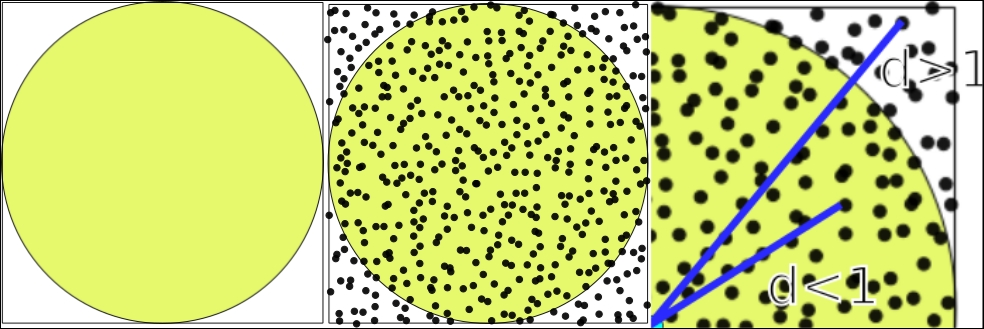
Ref: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781786466587/9/ch09lvl1sec54/example-2-calculating-pi-number-in-parallel


Bu sebeple ilk fonksiyonumuz **random.uniform** ile başlayalım. Bu yöntemle arttığımız her dart/ok'un herhangi bir noktaya isabet etme ihtimalini eşitlemiş oluyoruz. 

Küçük bir ayrıntı olarak kare ve dairenin merkezini 0,0 noktasına yerleştiriyoruz. Böylelikle kalenin bir ucu -1'den 1'e uzarken bir kenar uzunluğu da 2 olmuş oluyor.

Dolayısıyla kartezyen koordinatta iki boyutlu -1 ve 1 arasında rastgele sayılar üreteceğiz. Bu üretilen sayılar dartımızı/okumuzu attığımı koordinati vermiş olacak.

Daha sonra bu koordinatların daire içinde kalıp kalmadıklarını test ederek daire içine düşmüşler ise **iceride** diye tanımladığımız değişkeni 1 arttıracağız. Sonra da **iceride** değişkenini tüm **atissayisi**'na böleceğiz.

Hatırlarsanız okun daire içine düşen miktarının tüm kare alanına düşen miktarı **pi/4** dü. Yukarıda çıkan oranı da o sebeple 4 ile çarpınca pi'yi bulmuş olacağız. Yani:
* (iceride/atissayisi)\*4 = pi

In [34]:
random.uniform(-1,1)

-0.5082280236553589

Adım adım kodumuz şöyle çalışacak
1. Önce toplam deneme/atış sayısını belirleyeceğiz. Bilgisayarınız yavaş ise 1000 vs belirleyin : atissayisi=100000
2. Attığımız ok karenin içinde çemberin alanına düşerse bu olasılığın kaydını tutacağımız **iceride** değişkeni
3. Atış sayısınca tekrar et (for döngüsü)
4. Attığımız ok'un x koorditanı -1 ve 1 arasına denk gelecek şekilde rastlantısal şekilde belirleyim random.uniform
5. Aynı mantıkla(4.adımdaki) y koordinatını da belirleyelim
6. Eğer Euclid uzaklığı yani x ve y'nin kareleri toplamı 1'e eşit ve altında ise: (not: *burada karekök almadım, zaten 1'den düşük olma koşuluna bakıyoruz, 1'in karekökü 1*)
<br/>6.1. iceride değişkenini 1 arttır
7. Tüm simulasyon bittikten sonra iceri düşenlerin miktarını(*iceride*) tüm atış sayısına(*atissayisi*) bölerek 4 ile çarp. 

In [35]:
atissayisi=100000                # adım 1
iceride=0                        # adım 2
for d in range(atissayisi):      # adım 3
    x=random.uniform(-1,1)       # adım 4
    y=random.uniform(-1,1)       # adım 5
    if (x*x+y*y)<=1:             # adım 6
        iceride=iceride+1        # adım 6.1
print(4*iceride/atissayisi)      # adım 7

3.13364


Evet 100,000 adım ile bir pi sayısı ürettik. Ama acaba atissayisi arttıkça sonuç nereye gidiyor. Bunu da **kayit** değişkeni ile izleyelim

In [42]:
kayit=[]                         # tüm sonuçları hafızaya almak ve analiz etmek için dizi değişkeni kayit 
atissayisi=100                   # adım 1
simulasyonsayisi=50             # adım 1.1 simulasyon sayısı belirleyelim

for s in range(simulasyonsayisi):# simulasyon sayısı kadar tekrar et 
  iceride=0                        # adım 2, bu sefer iceride'yi her simulasyon adımında tekrar sıfırlıyoruz
  for d in range(atissayisi):      # adım 3
    x=random.uniform(-1,1)         # adım 4
    y=random.uniform(-1,1)         # adım 5
    if (x*x+y*y)<=1:               # adım 6
        iceride=iceride+1          # adım 6.1
  kayit.append((4*iceride/atissayisi) )   # hesapladığımız pi değerini hafızaya al
  atissayisi=100*simulasyonsayisi

50 simulasyonda her seferinde adım sayısını arttırarak (atissayisi=100\*simulasyonsayisi, yani 100,200,...5000 adıma kadar) pi sayısını hesapladığımızda sonucun gittikçe 3.14'e yakınsadığımı görürürüz. Önce grafiğine sonra histogramına bakalım. 

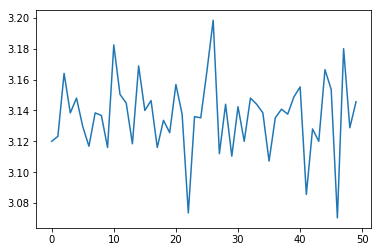

In [43]:
plot(kayit)

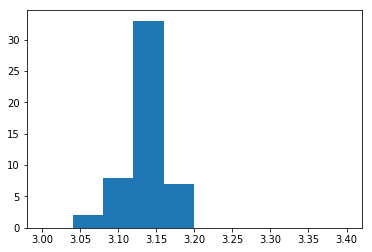

In [46]:
hist(kayit, range=(3,3.4));  # sondaki ; gereksiz ekran çıktılarından kurtulmak için

Hatta bir de ortalamasına bakalım

In [47]:
mean(kayit)

3.136464

Atış sayısını attırdıkça rakam daha fazla **pi** sayısına yaklaşacaktır.

Bu sebeple üşenmedim 104,857,600 defa çalıştırarak pi sayısını 3.1415010833740236 olarak da hesapladım.


# Sonuç

Monte Carlo yöntemi çıkışı itibari ile tek tek tüm olasılıkları deneyerek sonuca ulaşmanın imkansız olduğu durumlarda, tüm sistemi arka arkaya rastgele yöntemlerle çalıştırarak sonuca yaklaşmaya yardımcı olur. 

Özellikle bir çok tahmin yönteminde sisteme arka arkaya rastlantısal girdiler vererek tepkisini görmek önemlidir.

Bu örnekte:
* Rastgele adımlama ile 
* Pi sayısı tahmini ile
iki simulasyon yaptık.


Soru ve önerileriniz için barissanli2@gmail.com

Ankara, 5 Haziran 2019